In [2]:
import pandas as pd


dataset = pd.read_csv('diabetes.csv', header=None, sep=',', engine='python')
# delete first row
dataset = dataset.drop([0])

# make all data float
dataset = dataset.astype(float)
dataset.head()
inputs = dataset.iloc[:, 0:8].values
outputs = dataset.iloc[:, 8].values


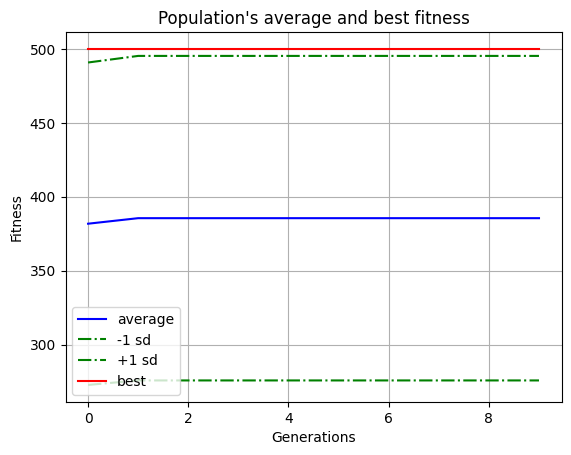

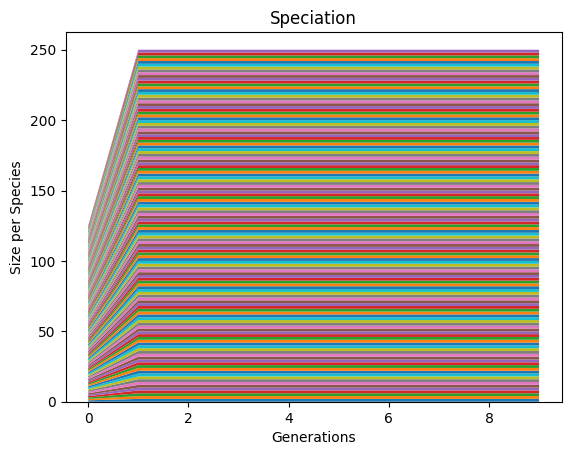


Output:


In [12]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

import os

import neat
import my_visualize as visualize
import numpy as np

# 5-input data and 1-output classification problem. Using numpy 
# inputs - float from 0 to 10
xor_inputs = np.array(inputs)
xor_outputs = np.array(outputs)

#xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
#xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = len(inputs)
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            #use threshold
            output = 1 if output[0] > 0.5 else 0
            genome.fitness -= (output - xo) ** 2



def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    #p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #p.add_reporter(neat.Checkpointer(5))

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 10)

   # Display the winning genome.
   #print('\nBest genome:\n{!s}'.format(winner))

   ## Show output of the most fit genome against training data.
   #print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
   #     print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}
    visualize.draw_net(config, winner, True, node_names=node_names)
    #visualize.draw_net(config, winner, True, node_names=node_names, prune_unused=True)
    visualize.plot_stats(stats, ylog=False, view=True)
    visualize.plot_species(stats, view=True)

    # output the structure of the winner
    print('\nOutput:')
    print(winner_net)



if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    config_path = 'A:/Профиль/Rab Table/Учёба/2/Neuroevolutionary-computing/Код/учимся/config-xor'
    run(config_path)